# Importing necessary libraries

In [1]:
import  pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.index

RangeIndex(start=0, stop=200, step=1)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# changing the column name


In [9]:
df.rename(columns={'Annual Income (k$)':'annual income'},inplace=True)
df.rename(columns={'Spending Score (1-100)':'spending score'},inplace=True)

# creating a cloumn for spending more than 50

In [10]:
segment_1=df['spending score'] > 50

In [11]:
df['segmentation']=segment_1

In [12]:
df.head()

,CustomerID,Gender,Age,annual income,spending score,segmentation
0,1,Male,19,15,39,False
1,2,Male,21,15,81,True
2,3,Female,20,16,6,False
3,4,Female,23,16,77,True
4,5,Female,31,17,40,False


In [13]:
df.loc[df['Gender']=='Male','Gender'] = 0
df.loc[df['Gender']=='Female','Gender'] = 1

In [14]:
df['segmentation']=df['segmentation']*1

In [15]:
df.head()

,CustomerID,Gender,Age,annual income,spending score,segmentation
0,1,0,19,15,39,0
1,2,0,21,15,81,1
2,3,1,20,16,6,0
3,4,1,23,16,77,1
4,5,1,31,17,40,0


In [16]:
df_kmeans=df.copy()

# import the kmeans and preprocessing library

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
scalar=StandardScaler()
df2=scalar.fit_transform(df)

In [19]:
wcss=[]
k=[2,3,4,5,6]
for i in k:
    kmeans=KMeans(n_clusters=i,max_iter=500,algorithm='lloyd')
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

C:\Users\gyhnjt\Documents\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gyhnjt\Documents\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gyhnjt\Documents\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gyhnjt\Documents\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a m

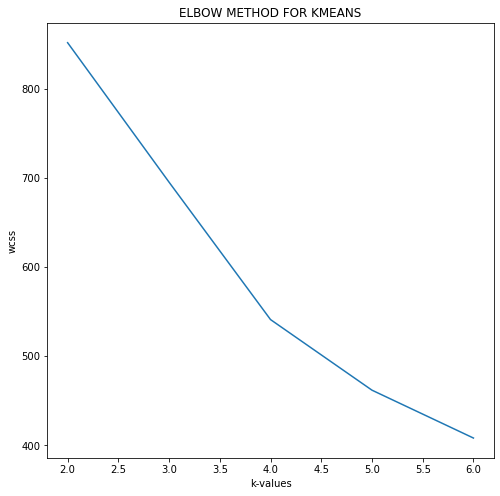

In [20]:
plt.figure(figsize=(8,8))
plt.plot(k,wcss)
plt.xlabel('k-values')
plt.ylabel('wcss')
plt.title('ELBOW METHOD FOR KMEANS')
plt.show()


# predicting for cluster = 4

In [21]:
labels=KMeans(n_clusters=4,random_state=10)
cluster=labels.fit_predict(df2)
print(cluster)


C:\Users\gyhnjt\Documents\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 0 0 0 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 0 0 0 0 0
 0 3 0 0 3 0 0 3 0 0 3 0 0 3 3 0 0 2 0 0 2 3 0 2 0 2 2 0 0 1 1 2 0 0 0 0 0
 1 2 2 2 2 0 1 0 1 1 2 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [22]:
df_kmeans['cluster']=cluster

In [23]:
df_kmeans

,CustomerID,Gender,Age,annual income,spending score,segmentation,cluster
0,1,0,19,15,39,0,3
1,2,0,21,15,81,1,3
2,3,1,20,16,6,0,0
3,4,1,23,16,77,1,3
4,5,1,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,1
196,197,1,45,126,28,0,2
197,198,0,32,126,74,1,1
198,199,0,32,137,18,0,2


<AxesSubplot:xlabel='cluster', ylabel='spending score'>

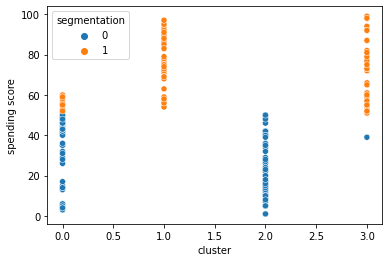

In [24]:
sns.scatterplot(x=df_kmeans['cluster'],y=df_kmeans['spending score'],hue=df_kmeans['segmentation'])


<AxesSubplot:xlabel='annual income', ylabel='spending score'>

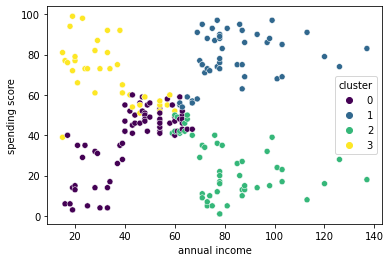

In [25]:
sns.scatterplot(x=df_kmeans['annual income'],y=df_kmeans['spending score'],hue=df_kmeans['cluster'],palette=sns.color_palette("viridis", as_cmap=True))
